In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Transactions.csv")
data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [3]:
customers_df = pd.read_csv("customers.csv")
customers_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# EDA

In [5]:
data.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [6]:
data.describe(include = 'all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [8]:
data['CustomerID'] = data['CustomerID'].fillna(0)
customers_df['CustomerID'] = customers_df['CustomerID'].fillna(0)
data['CustomerID'] 
customers_df['CustomerID']

0      C0001
1      C0002
2      C0003
3      C0004
4      C0005
       ...  
195    C0196
196    C0197
197    C0198
198    C0199
199    C0200
Name: CustomerID, Length: 200, dtype: object

In [9]:
data.isna().fillna(0)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [10]:
data['CutsomerID'] = pd.to_numeric(data['CustomerID'], errors='coerce')

In [11]:
data['CutsomerID']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: CutsomerID, Length: 1000, dtype: float64

In [12]:
data['CustomerID'] = data['CustomerID'].fillna(0)
data['CustomerID']

0      C0199
1      C0146
2      C0127
3      C0087
4      C0070
       ...  
995    C0118
996    C0059
997    C0018
998    C0115
999    C0024
Name: CustomerID, Length: 1000, dtype: object

In [13]:
data.isna().sum()

TransactionID         0
CustomerID            0
ProductID             0
TransactionDate       0
Quantity              0
TotalValue            0
Price                 0
CutsomerID         1000
dtype: int64

In [14]:
data['ProductID'].unique

<bound method Series.unique of 0      P067
1      P067
2      P067
3      P067
4      P067
       ... 
995    P037
996    P037
997    P037
998    P037
999    P037
Name: ProductID, Length: 1000, dtype: object>

In [15]:
total_revenue = data["TotalValue"].sum()

In [16]:
total_revenue

689995.56

In [17]:
most_purchased_product = data["ProductID"].value_counts().idxmax()
most_purchased_product

'P059'

In [18]:
highest_spending_customer = data.groupby("CustomerID")["TotalValue"].sum().idxmax()
highest_spending_customer

'C0141'

In [19]:
average_order_value = data["TotalValue"].mean()

In [20]:
average_order_value

689.9955600000001

In [21]:
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])


In [22]:

data["Month"] = data["TransactionDate"].dt.strftime('%Y-%m')  # Convert to string format YYYY-MM
monthly_sales = data.groupby("Month")["TotalValue"].sum()



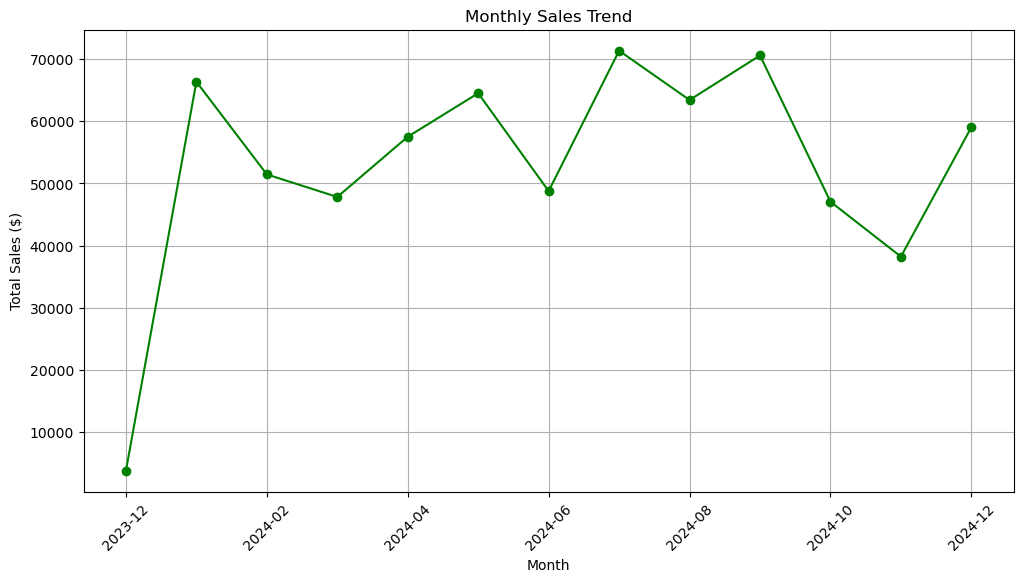

In [23]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

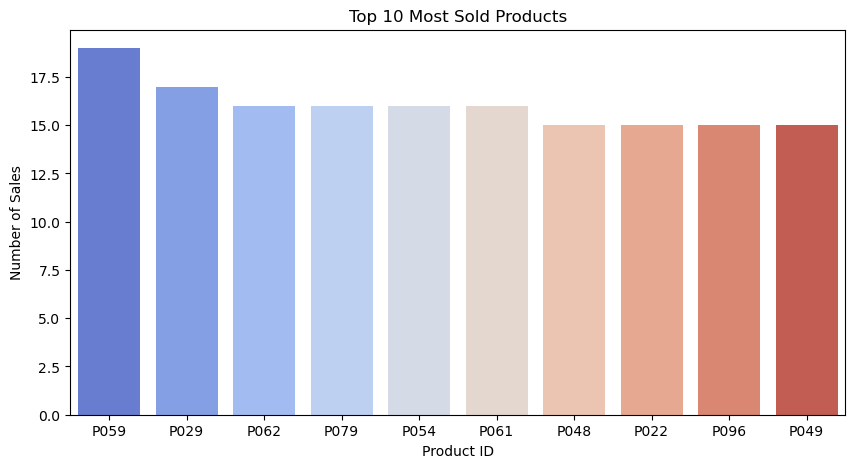

In [24]:
top_products = data["ProductID"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Sales")
plt.show()


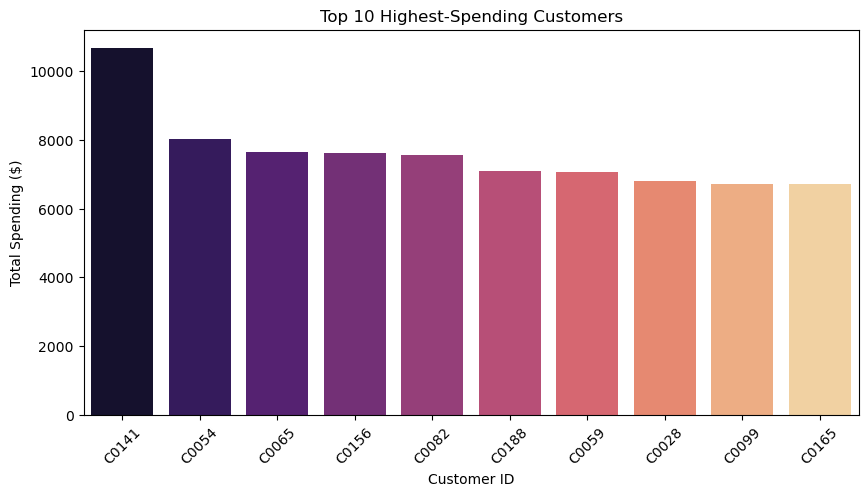

In [25]:
top_customers = data.groupby("CustomerID")["TotalValue"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="magma")
plt.title("Top 10 Highest-Spending Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending ($)")
plt.xticks(rotation=45)
plt.show()


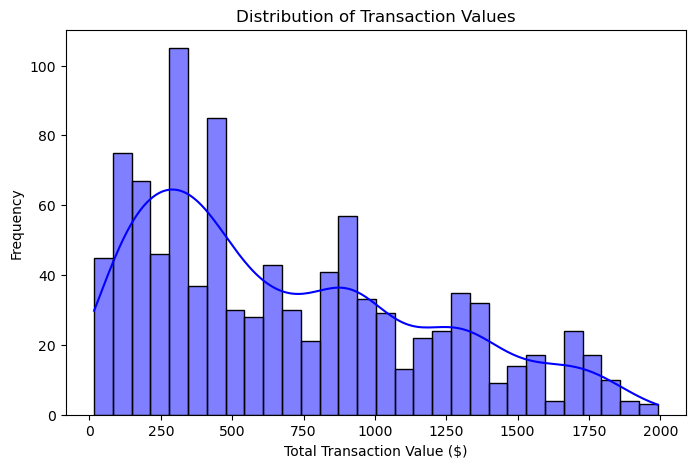

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(data["TotalValue"], bins=30, kde=True, color="blue")
plt.title("Distribution of Transaction Values")
plt.xlabel("Total Transaction Value ($)")
plt.ylabel("Frequency")
plt.show()


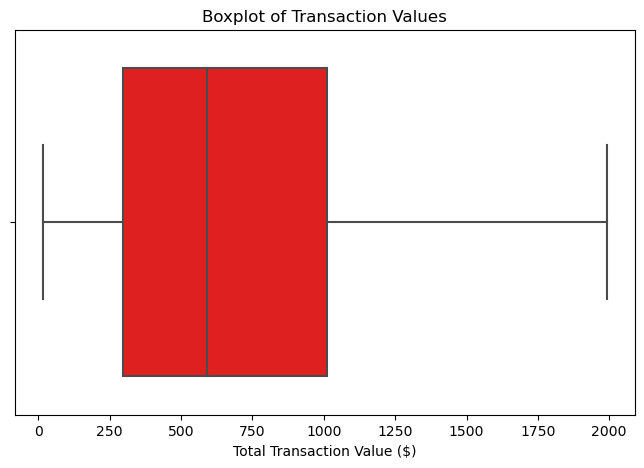

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["TotalValue"], color="red")
plt.title("Boxplot of Transaction Values")
plt.xlabel("Total Transaction Value ($)")
plt.show()


MODEL AND CLUSTERING

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [29]:
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
data["TransactionDate"]

0     2024-08-25 12:38:23
1     2024-05-27 22:23:54
2     2024-04-25 07:38:55
3     2024-03-26 22:55:37
4     2024-03-21 15:10:10
              ...        
995   2024-10-24 08:30:27
996   2024-06-04 02:15:24
997   2024-04-05 13:05:32
998   2024-09-29 10:16:02
999   2024-04-21 10:52:24
Name: TransactionDate, Length: 1000, dtype: datetime64[ns]

In [30]:
customer_product_matrix = data.pivot_table(index='CustomerID', columns='ProductID', values='TotalValue', aggfunc='sum', fill_value=0)
customer_product_matrix

ProductID,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,P091,P092,P093,P094,P095,P096,P097,P098,P099,P100
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,614.94,0.00,0.0,0.0,0.0
C0002,0.0,0.0,0.0,382.76,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,454.52,0.00,0.00,0.0,0.0,0.0
C0003,0.0,1385.2,0.0,0.00,0.0,363.96,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
C0004,0.0,0.0,0.0,0.00,0.0,0.00,0.0,293.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,958.02,0.0,0.0,0.0
C0005,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0196,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
C0197,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
C0198,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0


In [31]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(customer_product_matrix)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

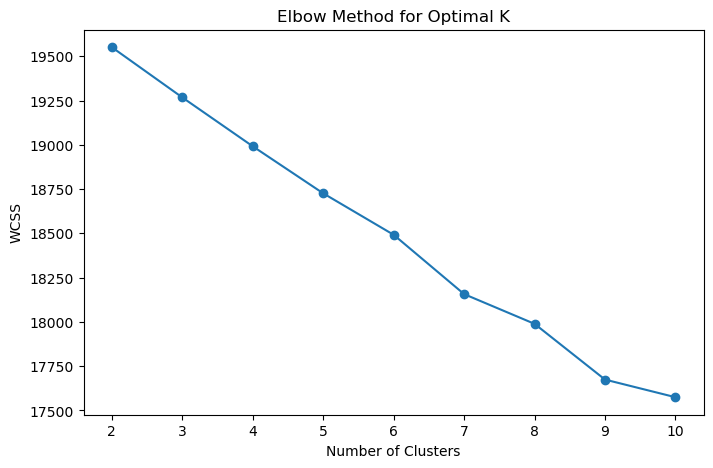

In [32]:
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [33]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_clusters = kmeans.fit_predict(normalized_data)
customer_product_matrix['Cluster'] = customer_clusters


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
similarity_matrix = cosine_similarity(customer_product_matrix.drop(columns=['Cluster']))
similarity_df = pd.DataFrame(similarity_matrix, index=customer_product_matrix.index, columns=customer_product_matrix.index)


In [35]:
def recommend_customers(customer_id, top_n=5):
    if customer_id not in similarity_df.index:
        return "Customer ID not found."
    
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:top_n+1]
    return similar_customers


In [36]:
customer_id = data['CustomerID'].sample().values[0]  
print(f"Top Similar Customers to {customer_id}:")
print(recommend_customers(customer_id))


Top Similar Customers to C0166:
CustomerID
C0088    0.635147
C0144    0.622310
C0125    0.489436
C0172    0.473712
C0086    0.384802
Name: C0166, dtype: float64


# Clustering

In [37]:
merged_df = pd.merge(data, customers_df, on='CustomerID', how='inner')


print(merged_df)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00761      C0199      P022 2024-10-01 05:57:09         4   
2          T00626      C0199      P079 2024-08-17 12:06:08         2   
3          T00963      C0199      P008 2024-10-26 00:01:58         2   
4          T00112      C0146      P067 2024-05-27 22:23:54         1   
..            ...        ...       ...                 ...       ...   
995        T00774      C0095      P056 2024-01-07 14:19:49         2   
996        T00823      C0095      P079 2024-09-30 10:45:06         3   
997        T00369      C0151      P082 2024-12-24 11:40:24         4   
998        T00809      C0078      P075 2024-12-09 11:44:44         2   
999        T00527      C0110      P028 2024-01-02 19:11:34         4   

     TotalValue   Price  CutsomerID    Month     CustomerName         Region  \
0        300.68  300.68         NaN  2024-08   Andrea J

In [38]:
features = [ "Price"]
for feature in features:
    if feature not in merged_df.columns:
        print(f"Missing required column: {feature}")
        exit()

In [39]:
X = merged_df[features] 

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

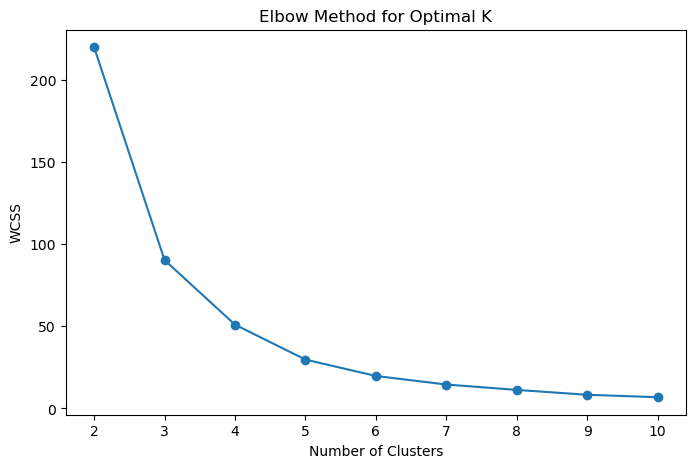

In [41]:
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [42]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
merged_df['Cluster'] = cluster_labels
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [43]:
db_index = davies_bouldin_score(X_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 0.4003


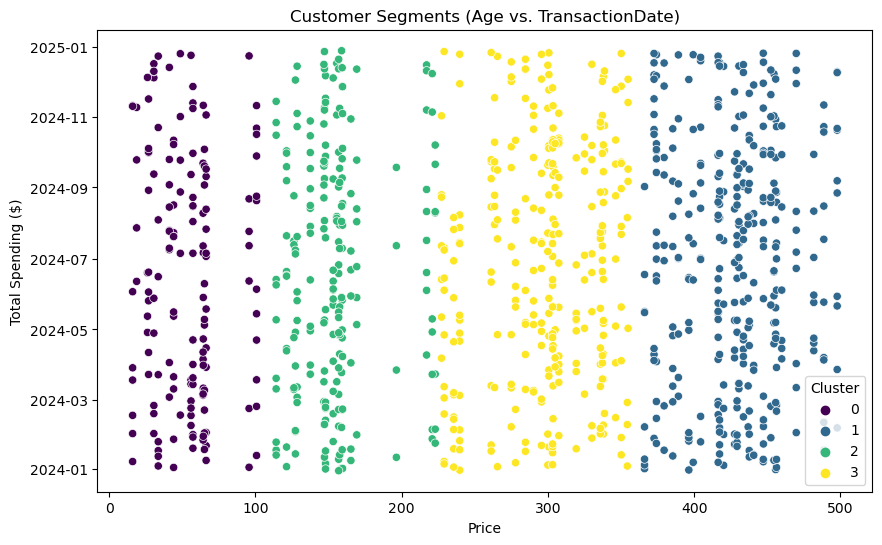

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['Price'], y=merged_df['TransactionDate'], hue=merged_df['Cluster'], palette='viridis')
plt.title("Customer Segments (Age vs. TransactionDate)")
plt.xlabel("Price")
plt.ylabel("Total Spending ($)")
plt.show()


In [40]:
merged_df .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   Month            1000 non-null   object        
 8   CustomerName     1000 non-null   object        
 9   Region           1000 non-null   object        
 10  SignupDate       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 93.8+ KB


In [41]:
merged_df.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
Month              0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

In [42]:
merged_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [43]:
merged_df.describe(include='all')

C:\Users\NAVEEN KUMAR\AppData\Local\Temp\ipykernel_3528\158023069.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_df.describe(include='all')


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Month,CustomerName,Region,SignupDate
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000,1000,1000,1000
unique,1000,199,100,1000,NaN,NaN,NaN,13,199,4,178
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN,2024-01,Abigail Jones,South America,2022-04-16
freq,1,11,19,1,NaN,NaN,NaN,107,11,304,19
first,NaN,NaN,NaN,2023-12-30 15:29:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2024-12-28 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000,NaN,NaN,NaN,NaN
